In [ ]:
# Parametere

l = 1 # [m], lengden av snora
g = 9.8 # [m/s^2], tyngdeakselerasjonen
theta_0 = 0.2 # [rad], initiell vinkel ift. vertikalen
w_0 = 0 # [rad/s], initiell vinkelhastighet
q = 1 # [s^-1], friksjonsparameter
w_d = 3.13 # [s^-1], drivkraftens vinkelfrekvens
F_d = 0.2 # [N], drivkraften 
dt = 0.01 # [s], tidssteg
T = 20 # [s], tid
m = 5 # [kg], masse til pendelen

**Diskretisering av differensiallikningen**

$\frac{d^2\theta}{dt^2} + \frac{g}{l}sin(\theta) + q\frac{d\theta}{dt}=\frac{F_d}{ml}sin((\omega)t)$

Med småvinkeltilnærmingen $sin(\theta)\approx\theta$ får vi diskretiseringen

$\frac{d\omega}{dt} = \frac{d^2\theta}{dt} = \frac{F_d}{ml}sin((\omega_d)t) - q\frac{d\theta}{dt} - \frac{g}{l}\theta$ 

$\omega = \frac{d\theta}{dt}$

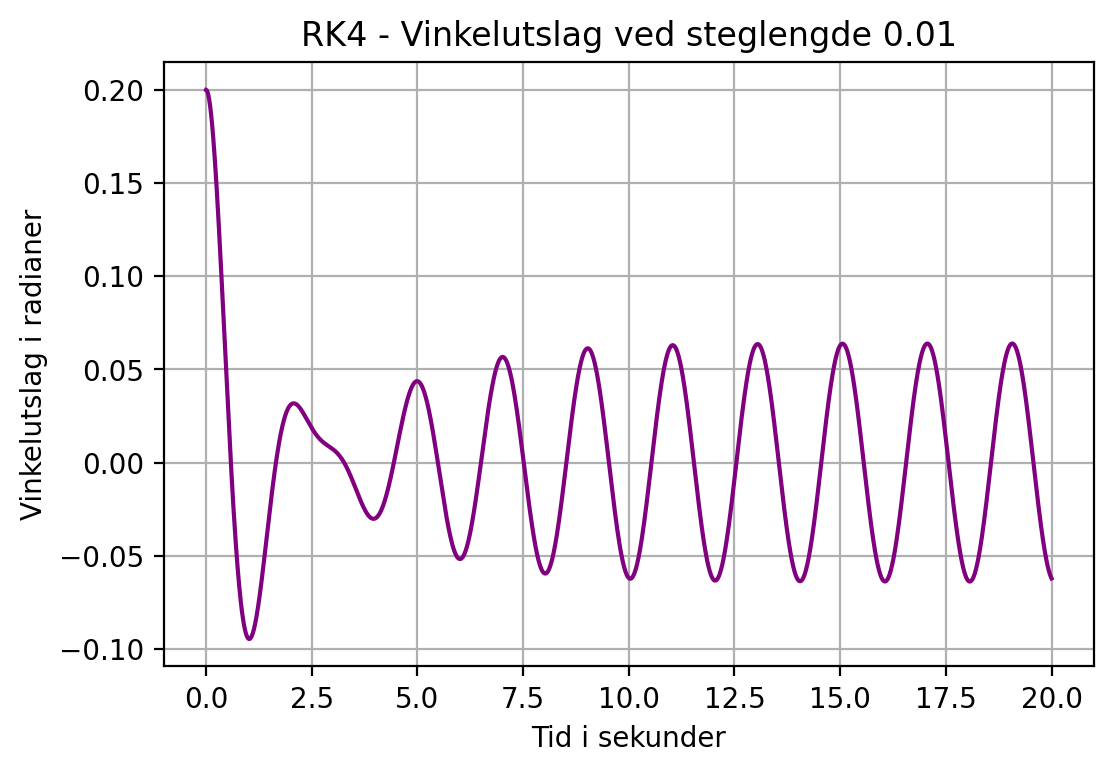

In [ ]:
# OPPGAVE 1

# Importerer nødvendige biblioteker

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200 

# Lager en funksjon som regner ut høyre side av diff. likningen

def k(theta, F_d, w_d, q, w, t):
    """
    Returns right-hand-side of eq.
    """
    return -g/l*theta - q*w + F_d*np.sin(w_d*t)

def f(w):
    """
    Returns right-hand-side of eq.
    """
    return w

def RK4_step(k, f, theta, w, dt, t):
    """
    Calculates one step of the RK4-algorithm.
    
    theta: float
    previous value of theta
           
    w: float
    previous value of w (omega, angular velocity)
    
    dt: float
    timestep
    
    return: two floats 
    """
    k1 = k(theta, F_d, w_d, q, w, t)
    f1 = f(w)
    k2 = k(theta + (dt/2)*f1, F_d, w_d, q, w, t)
    f2 = f(w + (dt/2)*k1)
    k3 = k(theta + (dt/2)*f2, F_d, w_d, q, w, t)
    f3 = f(w + (dt/2)*k2)
    k4 = k(theta + dt*f3, F_d, w_d, q, w, t)
    f4 = f(w + dt*k3)
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(k, f, theta_0, w_0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    n = int(float(T)/dt) # number of iterations
    theta = np.zeros(n+1)
    w = np.zeros(n+1)
    t = np.linspace(0, T, n + 1)
    theta[0] = theta_0
    w[0] = w_0
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(k, f, theta[i], w[i], dt, t[i]) # Calculates values of theta and omega using RK4-method

    return theta, w, t

theta, w, t = RK4_method(k, f, theta_0, w_0, dt, T)

plt.plot(t,theta, color='purple')
plt.title(f'RK4 - Vinkelutslag ved steglengde {dt}')
plt.xlabel('Tid i sekunder')
plt.ylabel('Vinkelutslag i radianer')
plt.grid()
plt.show()

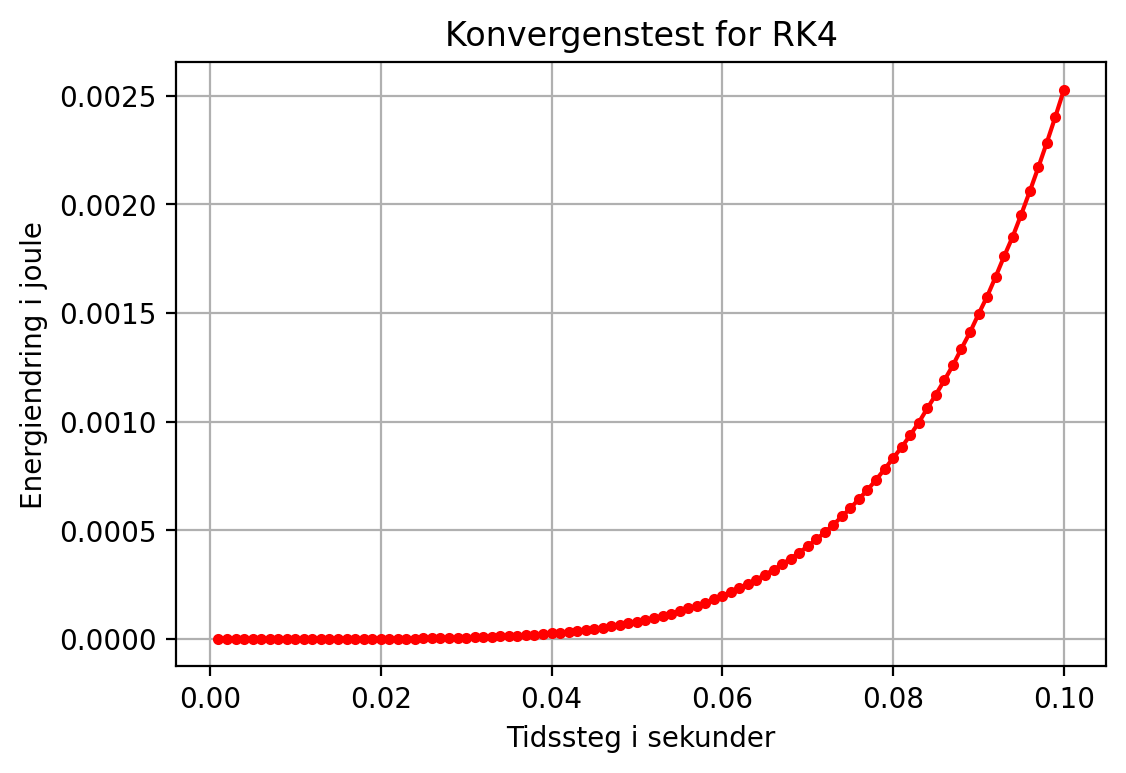

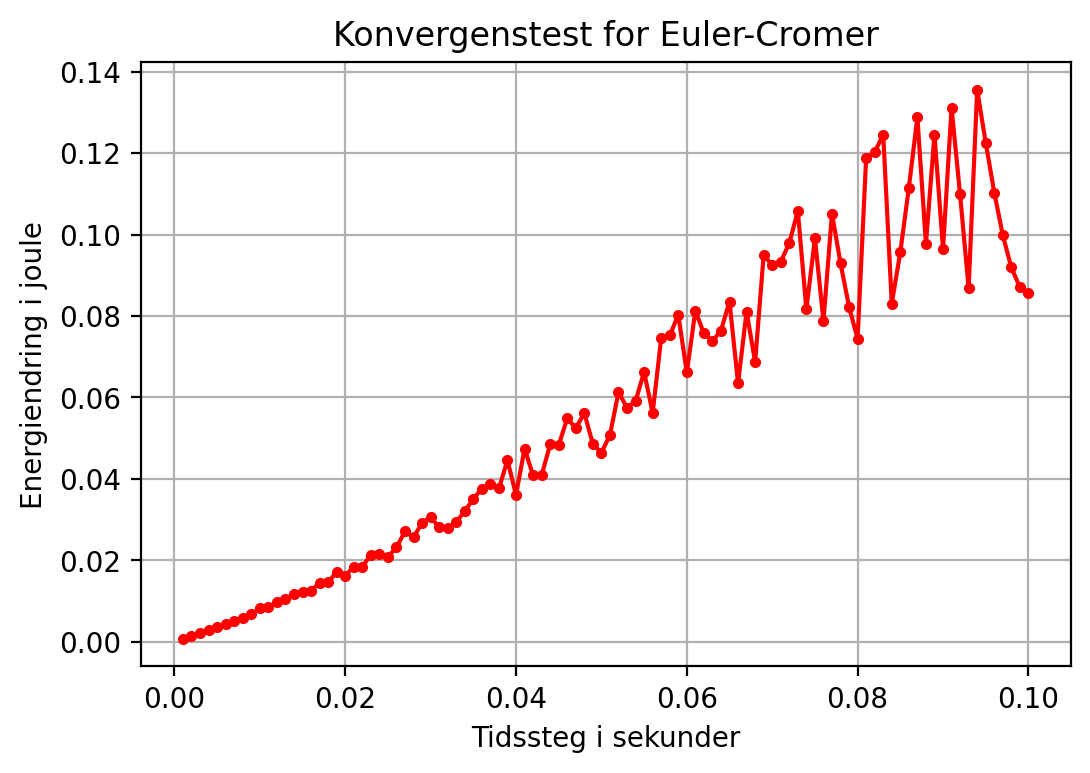

In [ ]:
# FORTSETTELSE OPPGAVE 2

# Definerer funksjon for Euler-Cromer

def euler_cromer_approx(theta_0, w_0, dt, T):
    
    N = int(T/dt)
    theta_1 = np.zeros(N)
    w_1 = np.zeros(N)
    t = np.linspace(0, T, N)
    theta_1[0] = theta_0
    w_1[0] = w_0
    for i in range(N-1):
        w_1[i+1] = w_1[i] - g/l*theta_1[i]*dt
        theta_1[i+1] = theta_1[i] + w_1[i+1]*dt
    return theta_1, w_1, t

# Lager en funksjon som regner ut energi

def energy(theta_arr, w_arr):    
    e_t = 0.5*m*g*l*theta_arr**2 + 0.5*m*l**2*w_arr**2
    return e_t

# Parametere og arrays for RK45

t_0 = 0.001
t_1 = 0.1
dt = 0.001
q = 0 # [s^-1], friksjonsparameter
w_d = 0 # [s^-1], drivkraftens vinkelfrekvens
F_d = 0 # [N], drivkraften 

n = int(t_1/dt)
t = np.linspace(t_0, t_1, n)
energy_per_timestep_RK4 = np.zeros(n)
energy_per_timestep_euler = np.zeros(n)



for index in range(n):

    theta_rk, w_rk, t_rk = RK4_method(k,f,theta_0,w_0,t[index],T)
    energy_rk = energy(theta_rk, w_rk)
    energy_per_timestep_RK4[index] = np.abs(energy_rk[0]-energy_rk[-1])

    theta_euler, w_euler, t_euler = euler_cromer_approx(theta_0,w_0,t[index],T)
    energy_euler = energy(theta_euler, w_euler)
    energy_per_timestep_euler[index] = np.abs(energy_euler[0]-energy_euler[-1])

plt.plot(t,energy_per_timestep_RK4, color='r', marker='.')


plt.title("Konvergenstest for RK4")
plt.ylabel("Energiendring i joule")
plt.xlabel("Tidssteg i sekunder")
plt.grid()

plt.figure()

plt.plot(t,energy_per_timestep_euler,'r',marker='.')

plt.title("Konvergenstest for Euler-Cromer")
plt.ylabel("Energiendring i joule")
plt.xlabel("Tidssteg i sekunder")

plt.grid()
plt.show()

**Oppgave 2**

Ser av grafen til RK45 at energidifferansen er svært liten mellom 0 og 0.04. Derfor vil dette være et passende tidssteg for RK45, slik at dt=0.01, som er brukt er fint. En kunne eventuelt vurdert om det hadde vært hensiktsmessig å øke tidsintervallet opp mot 0.04 for å få en raskere kode dersom det hadde vært nødvendig å kjørte svært mange iterasjoner. For Euler-Cromer ser vi derimot at energien raskt løper løpsk, så dt=0.01 hadde ikke vært optimalt, slik at om vi brukte Euler-Cromer måtte det blitt brukt et mindre tidssteg.

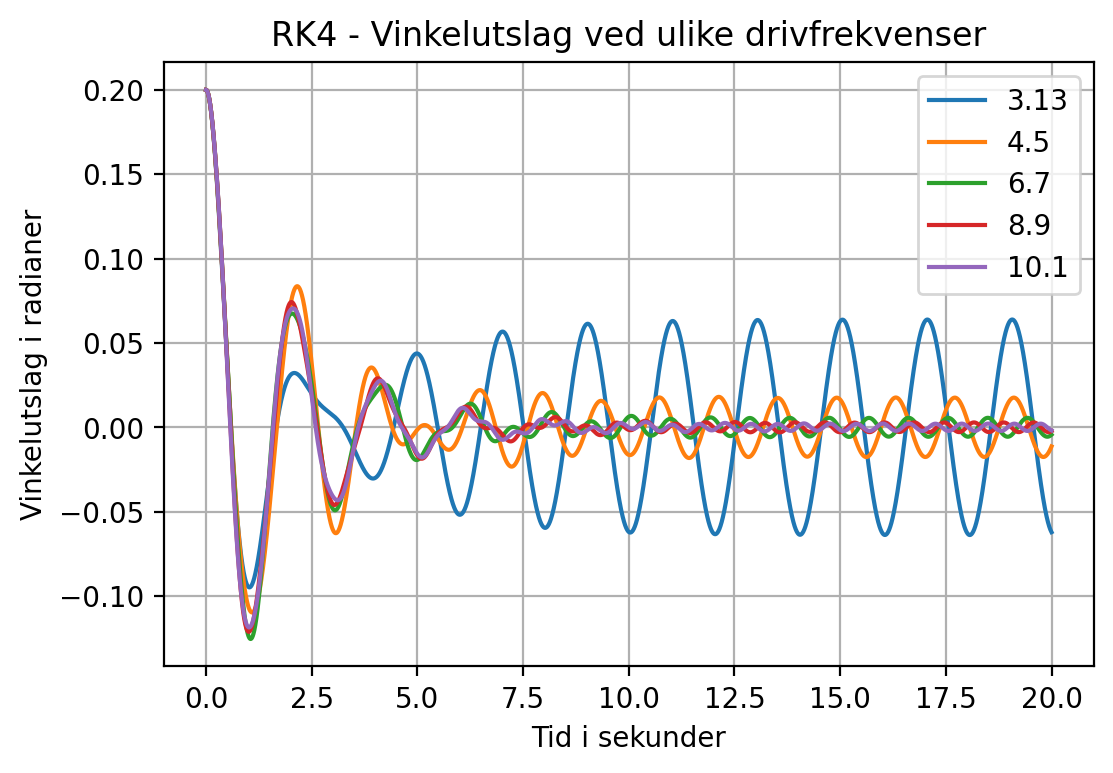

In [ ]:
 # OPPGAVE 3

F_d = 0.2
q = 1

drivfrekvenser = [3.13,4.5,6.7,8.9,10.1]

for val in drivfrekvenser:
    w_d = val
    theta, w, t = RK4_method(k,f, theta_0, w_0,dt,T)
    plt.plot(t,theta, label=f"{w_d}")
    plt.title('RK4 - Vinkelutslag ved ulike drivfrekvenser')
    plt.xlabel('Tid i sekunder')
    plt.ylabel('Vinkelutslag i radianer')

plt.grid()
plt.legend()
plt.show()


**Oppgave 3**

Ser at en tydelige sammenheng mellom resonansamplitude og drivfrekvens, da vi kan lese av negativ korrelasjon. Dette innebærer at resonansamplituden øker når drivfrekvensen minker. 

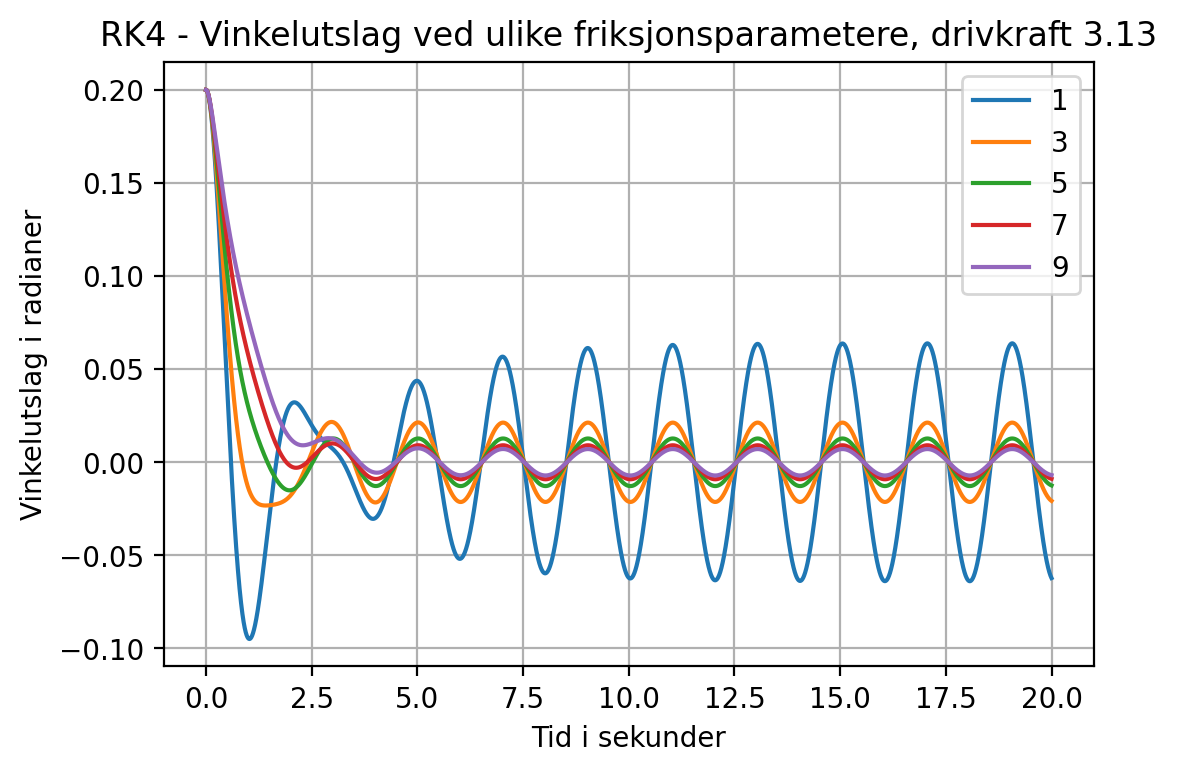

In [ ]:
# OPPGAVE 4

friksjonsparametere = [1,3,5,7,9]
w_d = 3.13

for val in friksjonsparametere:
    q = val
    theta, w, t = RK4_method(k,f, theta_0, w_0, dt, T)
    plt.plot(t,theta, label=f"{q}")
    plt.title(f'RK4 - Vinkelutslag ved ulike friksjonsparametere, drivkraft {w_d}')
    plt.xlabel('Tid i sekunder')
    plt.ylabel('Vinkelutslag i radianer')
plt.grid()
plt.legend()
plt.show()


**Oppgave 4**

Ser at resonansamplituden øker når q minker. 

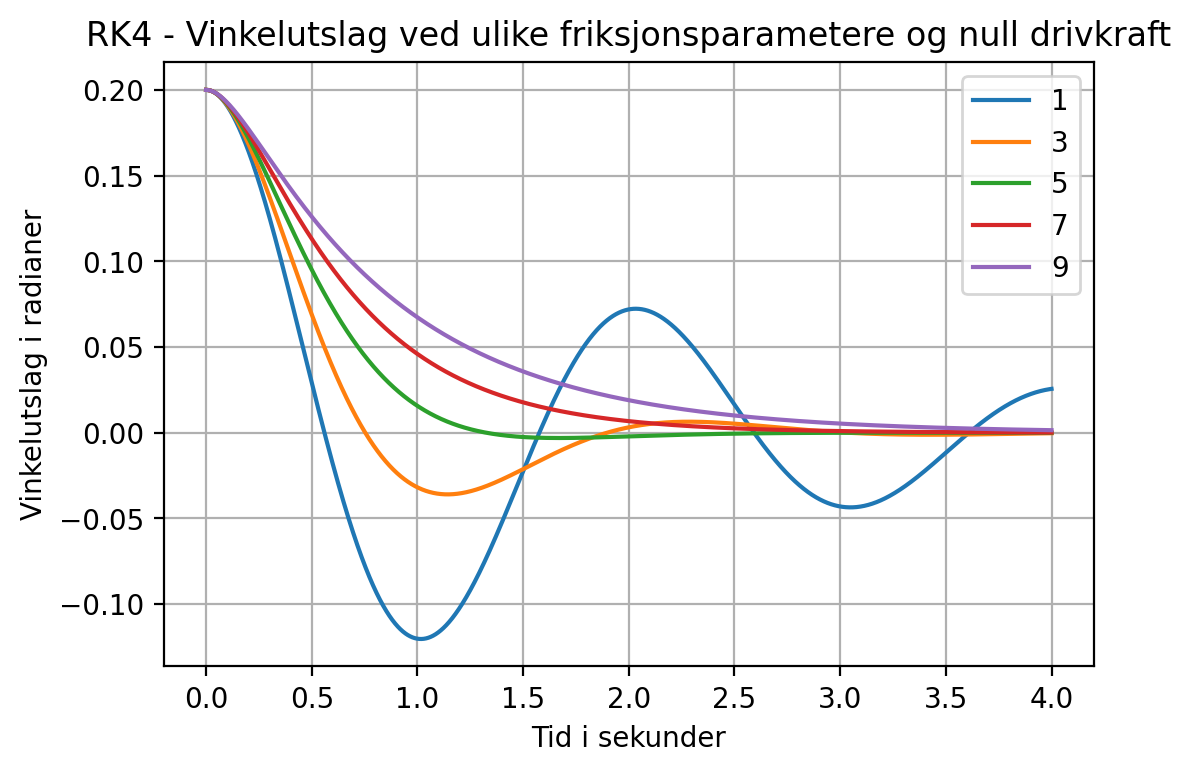

In [ ]:
# OPPGAVE 5

F_d = 0

friksjonsparametere = [1,3,5,7,9]

for val in friksjonsparametere:
    q = val
    theta, w, t = RK4_method(k,f, theta_0, w_0, dt,4)
    plt.plot(t,theta, label=f"{q}")
    plt.title('RK4 - Vinkelutslag ved ulike friksjonsparametere og null drivkraft')
    plt.xlabel('Tid i sekunder')
    plt.ylabel('Vinkelutslag i radianer')
plt.grid()
plt.legend()
plt.show()

**Oppgave 5**

Vet fra mekanikken at vi får underkritisk demping når q < w_0, og av grafen ser vi at dette er når q=1. Vi får overkritisk demping når q > w_0, og av grafen ser vi at dette er når q = 5 og over. Vi får kritisk demping når q = w_0, og ser at dette er når q = 3. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=babb5e30-8f08-4538-94bc-092d15928823' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>